<a href="https://colab.research.google.com/github/haithem151193/haithem/blob/main/Workshop_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("Consommation-autos.txt",delimiter= '\t')

**Preprocessing**

In [ ]:
data.head()

,modele,prix,cylindree,puissance,poids,conso
0,Daihatsu Cuore,11600,846,32,650,5.7
1,Suzuki Swift 1.0 GLS,12490,993,39,790,5.8
2,Fiat Panda Mambo L,10450,899,29,730,6.1
3,VW Polo 1.4 60,17140,1390,44,955,6.5
4,Opel Corsa 1.2i Eco,14825,1195,33,895,6.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   modele     31 non-null     object 
 1   prix       31 non-null     int64  
 2   cylindree  31 non-null     int64  
 3   puissance  31 non-null     int64  
 4   poids      31 non-null     int64  
 5   conso      31 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
data.isnull().sum()

modele       0
prix         0
cylindree    0
puissance    0
poids        0
conso        0
dtype: int64

==> No missing values

In [ ]:
data.describe()

,prix,cylindree,puissance,poids,conso
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,43755.645161,2093.677419,97.096774,1256.129032,9.954839
std,55065.257963,1152.356582,69.340875,360.753170,3.569018
min,10450.000000,658.000000,29.000000,650.000000,5.700000
25%,19820.000000,1390.000000,55.000000,1042.500000,7.250000
50%,28750.000000,1984.000000,85.000000,1155.000000,9.300000
75%,39395.000000,2455.500000,106.500000,1525.000000,11.650000
max,285000.000000,5987.000000,325.000000,2250.000000,21.300000


**Checking for distinct values of modele column**

In [ ]:
data['modele'].value_counts()

Daihatsu Cuore             1
Fiat Tempra 1.6 Liberty    1
Toyota Previa salon        1
Seat Alhambra 2.0          1
Nissan Primera 2.0         1
Peugeot 806 2.0            1
Opel Omega 2.5i V6         1
Mitsubishi Galant          1
Mazda Hachtback V          1
Lancia K 3.0 LS            1
Hyundai Sonata 3000        1
Ford Fiesta 1.2 Zetec      1
Volvo 850 2.5              1
Honda Civic Joker 1.4      1
Fort Escort 1.4i PT        1
Citroen ZX Volcane         1
Suzuki Swift 1.0 GLS       1
VW Golt 2.0 GTI            1
Seat Ibiza 2.0 GTI         1
Renault Safrane 2.2. V     1
Peugeot 306 XS 108         1
Opel Astra 1.6i 16V        1
Maserati Ghibli GT         1
Mercedes S 600             1
Ferrari 456 GT             1
Toyota Corolla             1
Subaru Vivio 4WD           1
Opel Corsa 1.2i Eco        1
VW Polo 1.4 60             1
Fiat Panda Mambo L         1
Volvo 960 Kombi aut        1
Name: modele, dtype: int64

In [ ]:
# prompt: one hot encoding of modele column

data = pd.get_dummies(data, columns=['modele'])


In [ ]:
data.head()

,prix,cylindree,puissance,poids,conso,modele_Citroen ZX Volcane,modele_Daihatsu Cuore,modele_Ferrari 456 GT,modele_Fiat Panda Mambo L,modele_Fiat Tempra 1.6 Liberty,...,modele_Seat Alhambra 2.0,modele_Seat Ibiza 2.0 GTI,modele_Subaru Vivio 4WD,modele_Suzuki Swift 1.0 GLS,modele_Toyota Corolla,modele_Toyota Previa salon,modele_VW Golt 2.0 GTI,modele_VW Polo 1.4 60,modele_Volvo 850 2.5,modele_Volvo 960 Kombi aut
0,11600,846,32,650,5.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12490,993,39,790,5.8,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10450,899,29,730,6.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17140,1390,44,955,6.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14825,1195,33,895,6.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.corr()

,prix,cylindree,puissance,poids,conso,modele_Citroen ZX Volcane,modele_Daihatsu Cuore,modele_Ferrari 456 GT,modele_Fiat Panda Mambo L,modele_Fiat Tempra 1.6 Liberty,...,modele_Seat Alhambra 2.0,modele_Seat Ibiza 2.0 GTI,modele_Subaru Vivio 4WD,modele_Suzuki Swift 1.0 GLS,modele_Toyota Corolla,modele_Toyota Previa salon,modele_VW Golt 2.0 GTI,modele_VW Polo 1.4 60,modele_Volvo 850 2.5,modele_Volvo 960 Kombi aut
prix,1.000000,0.897779,0.935171,0.634961,0.891110,-0.050575,-0.108378,0.813091,-0.112253,-0.071303,...,-0.024791,-0.071640,-0.101199,-0.105378,-0.081785,0.024079,-0.041037,-0.089705,-0.013332,0.018687
cylindree,0.897779,1.000000,0.962513,0.837868,0.940992,-0.015409,-0.200944,0.544416,-0.192408,-0.082730,...,-0.017664,-0.017825,-0.231222,-0.177269,-0.122833,0.055455,-0.017664,-0.113330,0.054972,0.061092
puissance,0.935171,0.962513,1.000000,0.779823,0.952625,-0.021671,-0.174233,0.609987,-0.182262,-0.085908,...,-0.032377,-0.032377,-0.174233,-0.155497,-0.112673,-0.000259,-0.032377,-0.142115,0.023830,0.074684
poids,0.634961,0.837868,0.779823,1.000000,0.863862,-0.059743,-0.311828,0.223208,-0.270671,-0.090611,...,0.194913,-0.093183,-0.265526,-0.239804,-0.126623,0.279798,-0.052027,-0.154918,0.058582,0.161473
conso,0.891110,0.940992,0.952625,0.863862,1.000000,-0.060053,-0.221255,0.589959,-0.200455,-0.034052,...,0.085550,-0.023652,-0.164054,-0.216055,-0.148454,0.147951,-0.023652,-0.179655,0.043949,0.142751
modele_Citroen ZX Volcane,-0.050575,-0.015409,-0.021671,-0.059743,-0.060053,1.000000,-0.033333,-0.033333,-0.033333,-0.033333,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
modele_Daihatsu Cuore,-0.108378,-0.200944,-0.174233,-0.311828,-0.221255,-0.033333,1.000000,-0.033333,-0.033333,-0.033333,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
modele_Ferrari 456 GT,0.813091,0.544416,0.609987,0.223208,0.589959,-0.033333,-0.033333,1.000000,-0.033333,-0.033333,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
modele_Fiat Panda Mambo L,-0.112253,-0.192408,-0.182262,-0.270671,-0.200455,-0.033333,-0.033333,-0.033333,1.000000,-0.033333,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333
modele_Fiat Tempra 1.6 Liberty,-0.071303,-0.082730,-0.085908,-0.090611,-0.034052,-0.033333,-0.033333,-0.033333,-0.033333,1.000000,...,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333,-0.033333


==> High Correlation : Puissance, cylindree , prix, poids

**Visualization:**

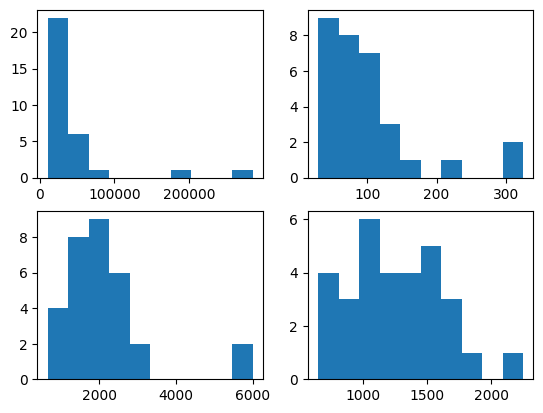

In [ ]:
# prompt: 4 histogram in same figure subplot

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2)
axs[0,0].hist(data['prix'])
axs[0,1].hist(data['puissance'])
axs[1,0].hist(data['cylindree'])
axs[1,1].hist(data['poids '])
plt.show()


==> prix E [0, 100000]
==> puissance E [0, 180]
==> cylindree E [0, 3000]
==> poids E [0, 1800]
prix ==> left skew
puissance ==> left skew
cylindree ==> Normal distribution
poids ==> Normal distribution


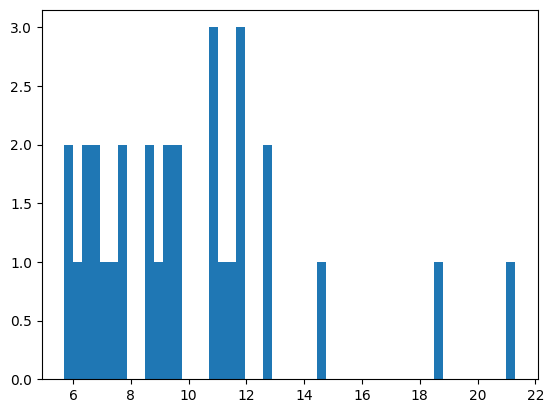

In [ ]:
# prompt: histogram of data['conso'] 50 bins

fig, ax = plt.subplots()
ax.hist(data['conso'], bins=50)
plt.show()


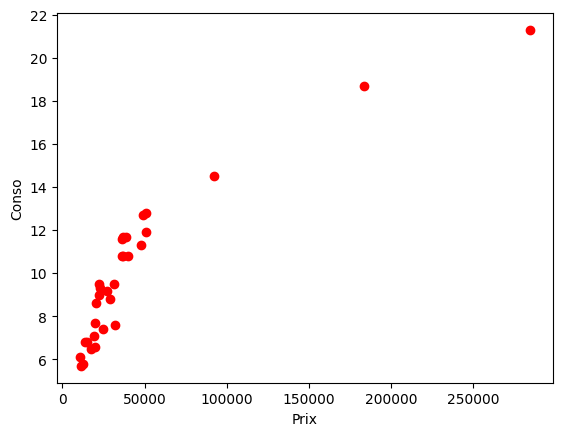

In [ ]:
# prompt: scatter plot of conso prix

plt.scatter(data['prix'], data['conso'], c='red')
plt.xlabel('Prix')
plt.ylabel('Conso')
plt.show()


==> Non lineard relationship between prix & conso  

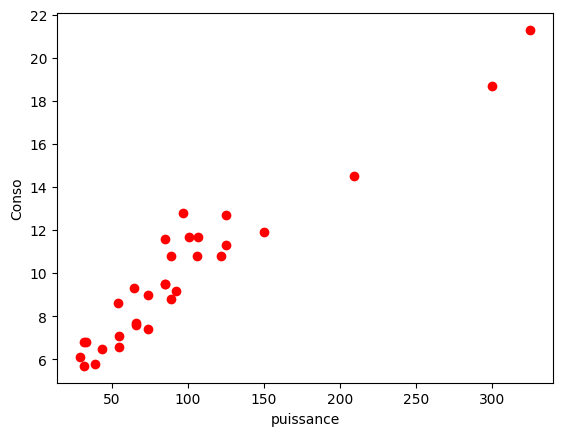

In [ ]:
plt.scatter(data['puissance'], data['conso'], c='red')
plt.xlabel('puissance')
plt.ylabel('Conso')
plt.show()


==> Linear relationship between conso and puissance

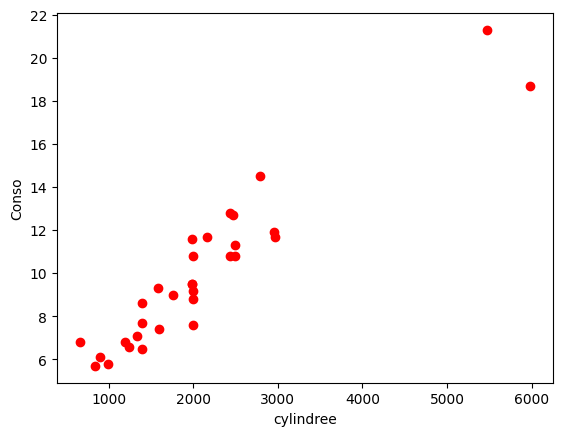

In [ ]:
plt.scatter(data['cylindree'], data['conso'], c='red')
plt.xlabel('cylindree')
plt.ylabel('Conso')
plt.show()


=> Linear relationship between conso & puissance
==> As cylinree increases, conso increases linearly.

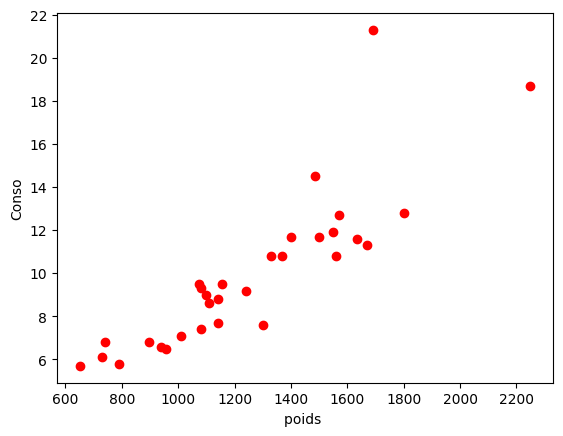

In [ ]:
plt.scatter(data['poids '], data['conso'], c='red')
plt.xlabel('poids ')
plt.ylabel('Conso')
plt.show()

==> As poids increases, conso increases linearly.

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
x= data['prix'].values[:,np.newaxis]
y= data['conso']
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(x, y ,test_size=0.25, random_state= 0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression()
model.fit(X_train_strat,y_train_strat) #build linear regression model
predicted_train=model.predict(X_train_strat)  #testing our model’s performance in train_set
predicted=model.predict(X_test_strat) #testing our model’s performance
print("MSE_train", mean_squared_error(y_train_strat,predicted_train))
print("R squared_train", metrics.r2_score(y_train_strat,predicted_train))
print("MSE", mean_squared_error(y_test_strat,predicted))
print("R squared", metrics.r2_score(y_test_strat,predicted))

MSE_train 2.6989290585830044
R squared_train 0.8201312390092761
MSE 2.147975452639065
R squared 0.5229371565487919


**Split Test **

In [ ]:
# prompt: split x y train test

from sklearn.model_selection import train_test_split
import numpy as np
x= data['prix'].values[:,np.newaxis]
y= data['conso']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 1.8767162914043936
R squared 0.8061693740467258


In [ ]:
predicted

array([ 7.91457556, 10.12758225,  8.57382725,  8.71060146,  8.81728534,
        9.95251127, 10.12211128,  8.56562079,  8.45346594,  9.32334991,
        8.09402332,  8.57929822, 17.40397013])

In [ ]:
x_test

array([[ 10450],
       [ 50900],
       [ 22500],
       [ 25000],
       [ 26950],
       [ 47700],
       [ 50800],
       [ 22350],
       [ 20300],
       [ 36200],
       [ 13730],
       [ 22600],
       [183900]])

In [ ]:
predicted1=model.predict(np.array([[30000],[32000],[32540]]))
predicted1

array([8.98414987, 9.09356924, 9.12311247])

Split choice for Linear Regression

In [ ]:
R2=[]
rangee=[]
for i in range(1, 30):
          x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1+0.01*i, random_state= 0)
          model=LinearRegression()   #build linear regression model
          model.fit(x_train,y_train)  #fitting the training data
          predicted=model.predict(x_test) #testing our model’s performance
          r2=metrics.r2_score(y_test,predicted)
          R2.append(r2)
          rangee.append((0.1+0.01*i)*100)


**==> This code helps you to determine which split is the best without checking the curve R2 versus test_size.**

In [ ]:
maxx=max(R2)
for i in range(0,len(R2)):
      if R2[i]==maxx:
        print(rangee[i]) # rangee: list of test size
        print('marked point in graph',i) # marked point in graph
        print(f'R2[{i}]=',R2[i])

39.0
marked point in graph 28
R2[28]= 0.8061693740467258


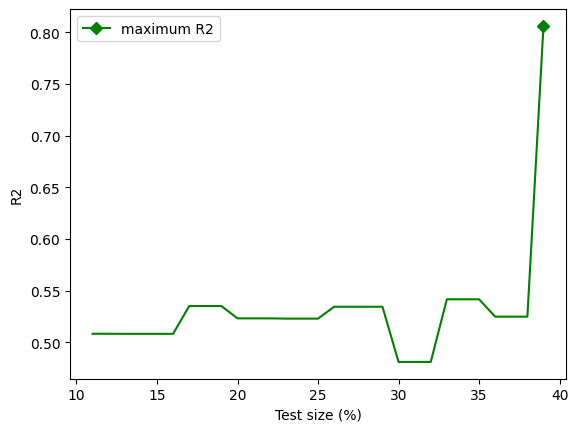

In [ ]:
# prompt: plot msee function of rangee
markers_on=[28]
plt.plot(rangee,R2, '-gD',markevery=markers_on, label='maximum R2')
plt.xlabel("Test size (%)")
plt.ylabel("R2")
plt.legend()
plt.show()


==> Best split is 61:39 for Linear Regression

In [ ]:
# prompt: split x y train test


x= data[['prix','puissance']]
y= data['conso']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.39, random_state=0)

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 1.6376922277840256
R squared 0.8308562082164026


==> Increase of R2

In [ ]:

x= data[['prix','puissance','cylindree']]
y= data['conso']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 3.0220263875670286
R squared 0.6878796922943056


==> Decrease of R2 compared to previous state(prix, puissance)
==> Cylinree is a noise

# **==>** Best choice for Linear Regression is prix & puissance for split = 61:39

**Polynomial Regression **

In [ ]:
x= data[['prix','puissance']]
y= data['conso']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
R2=[]
size=[]
for i in range(1, 12):
          x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i* 0.05,random_state=0)
          lg = LinearRegression()
          poly = PolynomialFeatures(degree = 2)   #fitting the training data
          x_train_fit = poly.fit_transform(x_train) #transforming our input data
          lg.fit(x_train_fit, y_train) #testing our model’s performance
          x_test_ = poly.fit_transform(x_test)
          predicted = lg.predict(x_test_)
          r2=metrics.r2_score(y_test,predicted)
          R2.append(r2)
          size.append(i)


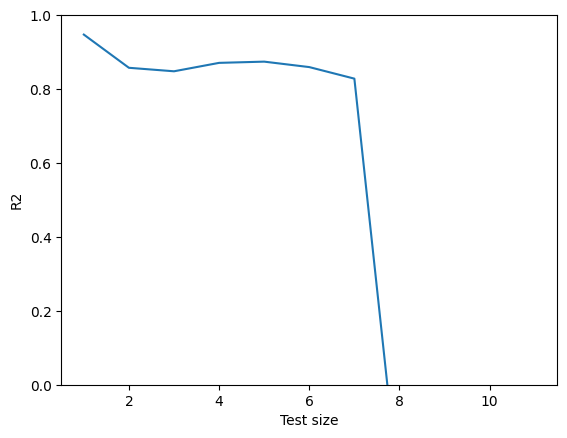

In [ ]:
plt.plot(size,R2)
plt.xlabel("Test size")
plt.ylabel("R2")
plt.ylim([0, 1])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0)
lg = LinearRegression()
poly = PolynomialFeatures(degree = 2)   #fitting the training data
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) #testing our model’s performance
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
r2=metrics.r2_score(y_test,predicted)
print('R2=', r2)

R2= 0.8574989291860989


In [ ]:
x= data[['prix','puissance']]
y= data['conso']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

R2=[]
degreee=[]
for i in range(1, 20):
          x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=0)
          lg = LinearRegression()
          poly = PolynomialFeatures(degree = i)   #fitting the training data
          x_train_fit = poly.fit_transform(x_train) #transforming our input data
          lg.fit(x_train_fit, y_train) #testing our model’s performance
          x_test_ = poly.fit_transform(x_test)
          predicted = lg.predict(x_test_)
          r2=metrics.r2_score(y_test,predicted)
          R2.append(r2)
          degreee.append(i)

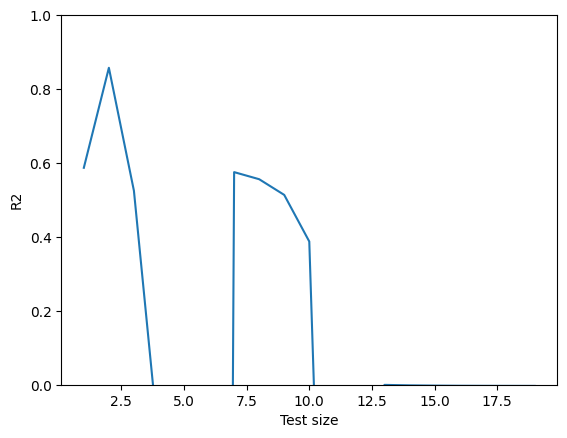

In [ ]:
# prompt: plot msee function of degreee

plt.plot(degreee,R2)
plt.xlabel("Test size")
plt.ylabel("R2")
plt.ylim([0, 1])
plt.show()

==> Best degree for polynomial Regression is 1 (Linear Regression) for split = 61:39

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=0)
lg = LinearRegression()
poly = PolynomialFeatures(degree = 2)   #fitting the training data
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) #testing our model’s performance
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
r2=metrics.r2_score(y_test,predicted)
print('R2=', r2)

R2= -0.30422297333628556


In [ ]:
x= data[['prix','puissance','cylindree']]
y= data['conso']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:

R2=[]
degreee=[]
for i in range(1, 20):
          x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i,random_state=0)
          lg = LinearRegression()
          poly = PolynomialFeatures(degree = i)   #fitting the training data
          x_train_fit = poly.fit_transform(x_train) #transforming our input data
          lg.fit(x_train_fit, y_train) #testing our model’s performance
          x_test_ = poly.fit_transform(x_test)
          predicted = lg.predict(x_test_)
          r2=metrics.r2_score(y_test,predicted)
          R2.append(r2)
          degreee.append(i)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


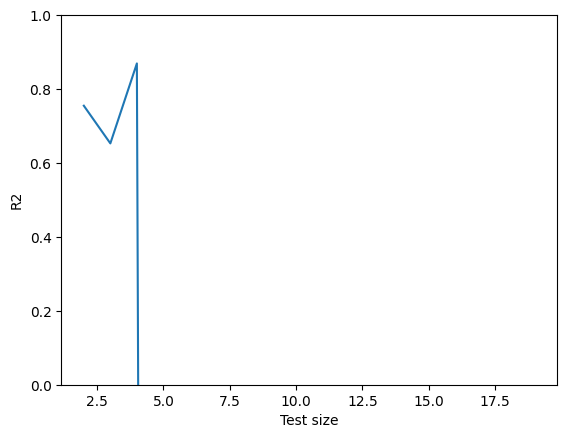

In [ ]:
plt.plot(degreee,R2)
plt.xlabel("Test size")
plt.ylabel("R2")
plt.ylim([0, 1])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=0)
lg = LinearRegression()
poly = PolynomialFeatures(degree = 1)   #fitting the training data
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train) #testing our model’s performance
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
r2=metrics.r2_score(y_test,predicted)
print('R2=', r2)

R2= 0.6878796922943644


# ==> Not Done. ( Normalization, Standardization )

In [ ]:
data.head()

,prix,cylindree,puissance,poids,conso,modele_Citroen ZX Volcane,modele_Daihatsu Cuore,modele_Ferrari 456 GT,modele_Fiat Panda Mambo L,modele_Fiat Tempra 1.6 Liberty,...,modele_Seat Alhambra 2.0,modele_Seat Ibiza 2.0 GTI,modele_Subaru Vivio 4WD,modele_Suzuki Swift 1.0 GLS,modele_Toyota Corolla,modele_Toyota Previa salon,modele_VW Golt 2.0 GTI,modele_VW Polo 1.4 60,modele_Volvo 850 2.5,modele_Volvo 960 Kombi aut
0,11600,846,32,650,5.7,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12490,993,39,790,5.8,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,10450,899,29,730,6.1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17140,1390,44,955,6.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14825,1195,33,895,6.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: normalization of data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(data)
data1 = scaler.transform(data)


array([[-5.93608032e-01, -1.10061556e+00, -9.54311963e-01, ...,
        -1.82574186e-01, -1.82574186e-01, -1.82574186e-01],
       [-5.77178222e-01, -9.70942228e-01, -8.51692688e-01, ...,
        -1.82574186e-01, -1.82574186e-01, -1.82574186e-01],
       [-6.14837563e-01, -1.05386259e+00, -9.98291652e-01, ...,
        -1.82574186e-01, -1.82574186e-01, -1.82574186e-01],
       ...,
       [-1.35788600e-01, -9.67499069e-02, -1.77337456e-01, ...,
        -1.82574186e-01, -1.82574186e-01, -1.82574186e-01],
       [ 1.31888084e-01,  3.03737796e-01, -1.41869965e-03, ...,
        -1.82574186e-01, -1.82574186e-01, -1.82574186e-01],
       [ 1.02351346e-01,  3.34612399e-01,  4.09058398e-01, ...,
        -1.82574186e-01, -1.82574186e-01,  5.47722558e+00]])